In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

from helper import (
    AR_generator,
    manual_ar_process,
    adf_test,
    yule_walker,
    calculate_unit_roots,
    plot_roots,
    path_constructor,
)

from setup.config_init import config

folder_path = config["PATH"]["path_applications"]
tex_path = config["PATH"]["path_tex"]

# Download data

In [2]:
data: pd.DataFrame = yf.download("^N225", period="5y")
print(data.head())
data.dropna(inplace=True)
data.drop(columns=["Adj Close", "Volume"], inplace=True)
data = data.iloc[:1000]

[*********************100%***********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2020-02-06  23641.099609  23995.369141  23625.130859  23873.589844   
2020-02-07  23899.009766  23943.449219  23759.419922  23827.980469   
2020-02-10  23631.789062  23788.250000  23621.720703  23685.980469   
2020-02-12  23741.210938  23869.730469  23693.720703  23861.210938   
2020-02-13  23849.759766  23908.849609  23784.310547  23827.730469   

               Adj Close    Volume  
Date                                
2020-02-06  23873.589844  95100000  
2020-02-07  23827.980469  65400000  
2020-02-10  23685.980469  56500000  
2020-02-12  23861.210938  74600000  
2020-02-13  23827.730469  64500000  


In [3]:
# convert dataframe to latex code
data.head().to_latex(path_constructor(tex_path, "nikkei_head.tex"))

In [4]:
close_price = data["Close"]
train_data, test_data = train_test_split(close_price, test_size=0.01, shuffle=False)

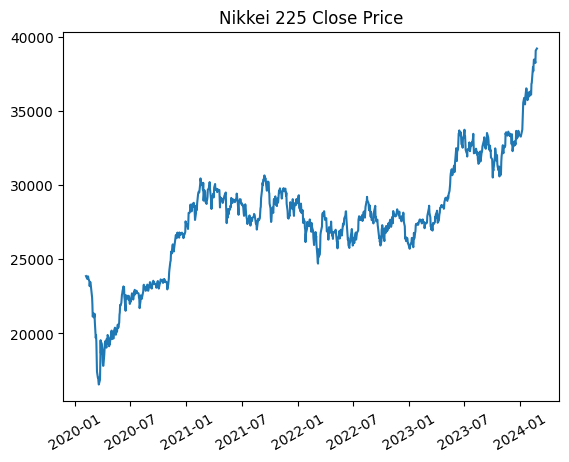

In [5]:
plt.title("Nikkei 225 Close Price")
plt.plot(train_data)
plt.xticks(rotation=30)
plt.savefig(path_constructor(folder_path, "nikkei_close"))

## Stationarity

we see that the series is not stationary, check with adf because cannot calculate the unit roots as the parameters are not known

In [6]:
dickey = adf_test(train_data)

Results of Dickey-Fuller Test:


In [7]:
train_data_diff = train_data.diff().dropna()
diff_dickey = adf_test(train_data_diff)

Results of Dickey-Fuller Test:


In [8]:
diff_dickey.to_latex(path_constructor(tex_path, "diff_dickey.tex"))

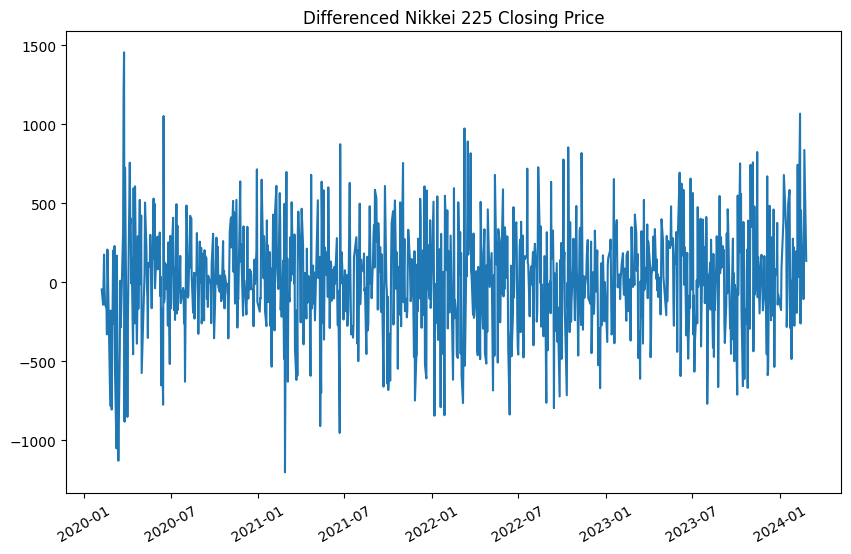

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(train_data_diff)
plt.title("Differenced Nikkei 225 Closing Price")
plt.xticks(rotation=30)
plt.savefig(path_constructor(folder_path, "nikkei_data_diff"))
plt.show()

## Plot ACF and PACF

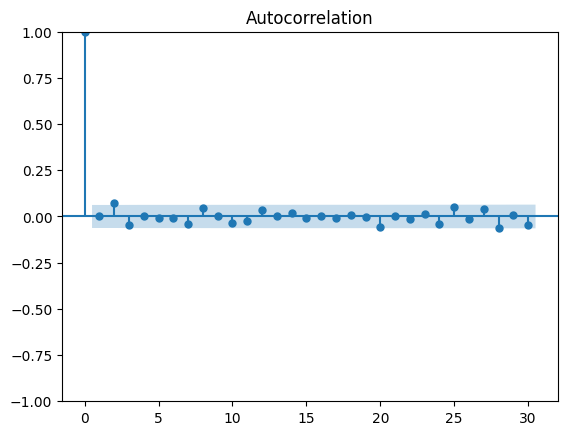

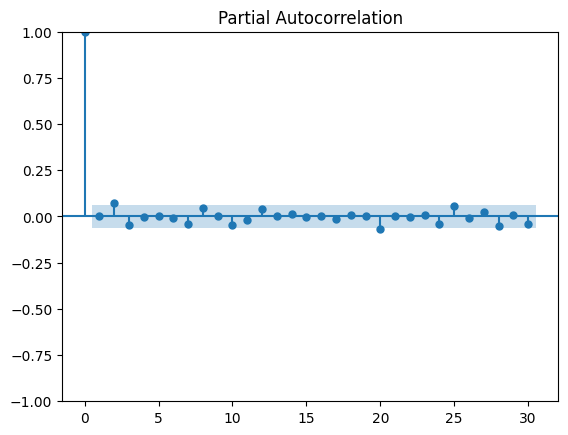

In [10]:
fig1 = plot_acf(train_data_diff, lags=30)
# plt.title("ACF")
plt.show()
fig1.savefig(path_constructor(folder_path, "nikkei_diff_acf"))

fig = plot_pacf(train_data_diff, lags=30)
# plt.title("PACF")
# plt.xticks(np.arange(0, 31, 2))
# plt.ylim(-0.1, 1)
plt.show()
fig.savefig(path_constructor(folder_path, "nikkei_diff_pacf"))

no insight through these plots, fit models and check values, AIC for example

## Train models

In [11]:
ar_aic_values = np.array([])
for k in range(1, 20):
    model_k = ARIMA(train_data_diff, order=(k, 0, 0)).fit()
    ar_aic_values = np.append(ar_aic_values, model_k.aic)

/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

In [12]:
ma_aic_values = np.array([])
for k in range(1, 20):
    model_k = ARIMA(train_data_diff, order=(0, 0, k)).fit()
    ma_aic_values = np.append(ma_aic_values, model_k.aic)

/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

In [13]:
arma_aic_values = np.array([])
for k in range(1, 8):
    for j in range(1, 8):
        model_k = ARIMA(train_data_diff, order=(k, 0, j)).fit()
        arma_aic_values = np.append(arma_aic_values, [model_k.aic, k, j])

/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

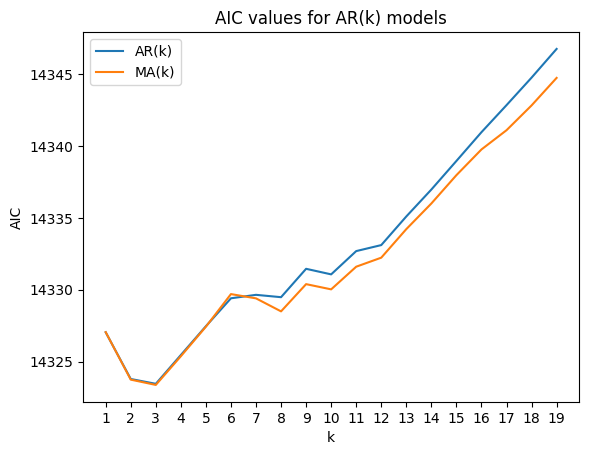

In [23]:
plt.plot(np.arange(1, 20), ar_aic_values, label="AR(k)")
plt.plot(np.arange(1, 20), ma_aic_values, label="MA(k)")
plt.xticks(np.arange(1, 20))
plt.title("AIC values for AR(k) models")
plt.xlabel("k")
plt.ylabel("AIC")
plt.legend()
plt.savefig(path_constructor(folder_path, "nikkei_values_aic"))

## Check residuals

In [15]:
model = ARIMA(train_data_diff, order=(3, 0, 3)).fit()

/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros a

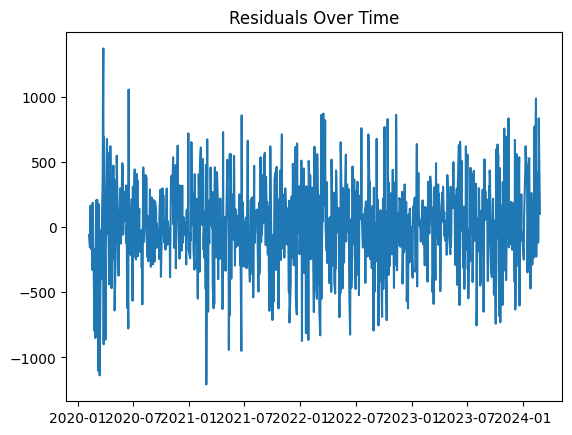

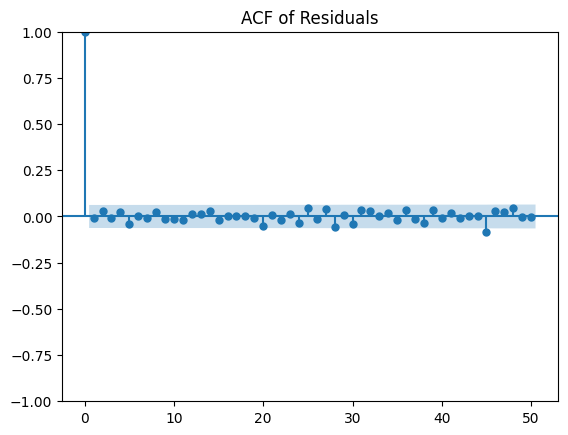

In [16]:
residuals = model.resid
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.show()

plot_acf(residuals, lags=50)
plt.title("ACF of Residuals")
plt.show()

## Compare paramters

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  989
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7154.177
Date:                Thu, 06 Feb 2025   AIC                          14324.354
Time:                        18:56:12   BIC                          14363.528
Sample:                             0   HQIC                         14339.251
                                - 989                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5314     11.235      1.382      0.167      -6.488      37.551
ar.L1          0.3743      0.517      0.724      0.469      -0.639       1.388
ar.L2         -0.3625      0.280     -1.296      0.195      -0.911       0.186
ar.L3          0.7166      0.458      1.566      0.117      -0.180       1.613
ma.L1         -0.3583      0.511     -0.702      0.483      -1.359       0.642
ma.L2          0.4087      0.281      1.452      0.146      -0.143       0.960
ma.L3         -0.7801      0.474     -1.647      0.100      -1.708       0.148
sigma2      1.133e+05   4447.434     25.479      0.000    1.05e+05    1.22e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                21.30
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.05
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/bsc_thesis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


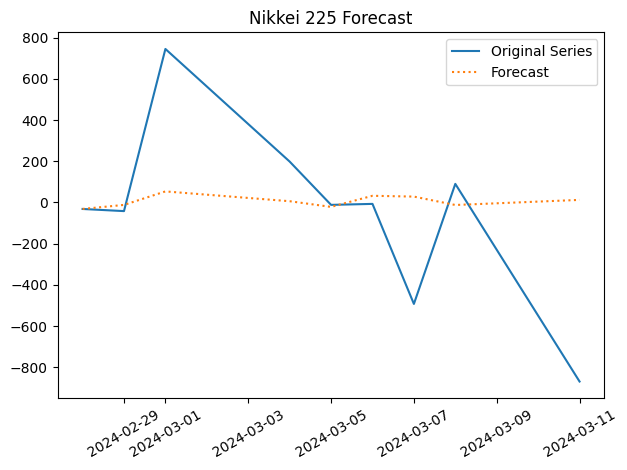

In [18]:
forecast = model.get_forecast(steps=10)
forecast_values = forecast.predicted_mean
forecast_values.index = test_data.index

# Plot
plt.plot(test_data.diff().dropna(), label="Original Series")
plt.plot(forecast_values[1:], label="Forecast", linestyle="dotted")
plt.legend()
plt.title("Nikkei 225 Forecast")
plt.xticks(rotation=30)
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.savefig(path_constructor(folder_path, "nikkei_forecast"))
plt.show()

## Forecast with the estimated parameters from Yule Walker

In [19]:
estimators, est_var = yule_walker(train_data_diff, 3)

In [20]:
print(estimators, est_var)

[ 0.00595056  0.07294216 -0.04867455] 112956.78723038509


In [21]:
yulewlaker_test = train_data_diff[988:]
estimated_noise = np.random.normal(0, np.sqrt(est_var), 10)
new_predicted = np.zeros(10)
new_predicted[:2] = yulewlaker_test[:2]

for k in range(2, 10):
    new_predicted[k] = (
        sum(estimators[i] * new_predicted[k - i - 1] for i in range(2))
        + estimated_noise[k]
    )

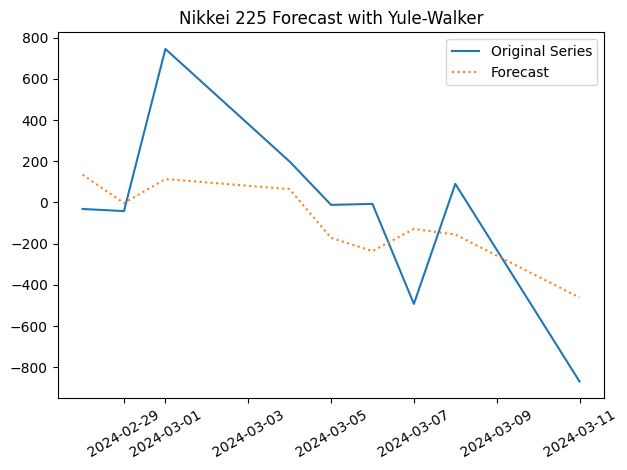

In [22]:
new_predicted = pd.Series(new_predicted)
new_predicted.index = test_data.index
plt.plot(test_data.diff().dropna(), label="Original Series")
plt.plot(new_predicted[1:], label="Forecast", linestyle="dotted")
plt.legend()
plt.title("Nikkei 225 Forecast with Yule-Walker")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(path_constructor(folder_path, "yule_walker_nikkei_forecast"))
plt.show()